# Break out the next step proposal

- We want a separate module for `next_step_proposals`, living in a separate file
    -  a Gaussian one (it's the one currently in the Walker code)
    -  a square one (you can find an example below)
- As discussed, this can work by passing the fuction for a `next_step_proposal` as well as the arguments for that function to the Walker constructor.

# 1. Your Dream Code
The following is our current code. Modify it as though you had already written the module as in the previous exercises.
-  Modify the imports
-  Modify the Walker instantiation to take a `next_step_proposal` function and a `next_step_proposal_arguments` dictionary as an input


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from context_maps import flat_context_map, hills_context_map, labyrinth_context_map
from plotting import plot_trajectory, plot_trajectory_hexbin
from walker import Walker

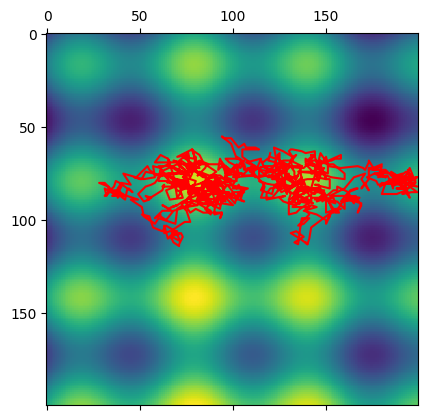

In [5]:
context_map = hills_context_map(size=200)
walker = Walker(sigma_i=3, sigma_j=4, context_map=context_map)

# Sample a next step 1000 times
i, j = 100, 50
trajectory = []
for _ in range(1000):
    i, j = walker.sample_next_step(i, j)
    trajectory.append((i, j))
    
plot_trajectory(trajectory, walker.context_map)

# 2. Implement the changes in the code
1. In a new module `next_step_proposals`, write two functions for two different next step proposals: a Gaussian one (it's the one currently in the Walker code) and a square one (you can find an example below)
2. Modify the constructor of Walker to take a `next_step_proposal` function and a `next_step_proposal_arguments` dictionary as an input
3. See if your changes dream code works in this notebook! (Don't forget to restart the kernel)

# How the square next step proposal could look like

This is an example of how the square next step proposal function could look like.

Notice that there are 4 arguments. `current_i`, `current_j`, and `size` are known to the Walker, and can be passer quite easily. `width` is a parameter that is dependent on this kind of next step proposal, and will be passed in the `next_step_proposal_arguments` dictionary.

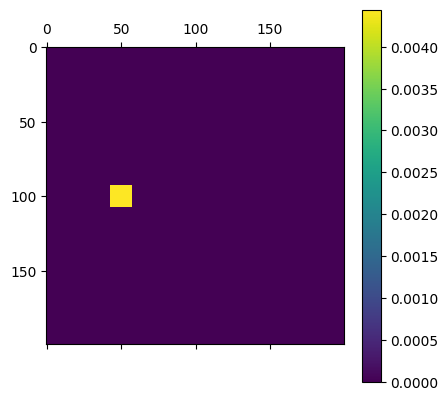

In [3]:
def square_next_step_proposal(current_i, current_j, size, width):
    """ Square next step proposal. """
    grid_ii, grid_jj = np.mgrid[0:size, 0:size]
    inside_mask = (np.abs(grid_ii - current_i) <= width // 2) & (np.abs(grid_jj - current_j) <= width // 2)
    p_next_step = inside_mask / inside_mask.sum()
    return p_next_step

p = square_next_step_proposal(100, 50, 200, 14)
plt.matshow(p)
plt.colorbar()